In [1]:
# ingest the data

In [3]:
import pandas as pd

In [17]:
data=pd.read_csv(r"C:\Users\DHINESH BABBU A\Documents\Full Stack Data Science\End_To_End\notebooks\data\train.csv")
data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [5]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [18]:
data.drop(['id'],axis=1,inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


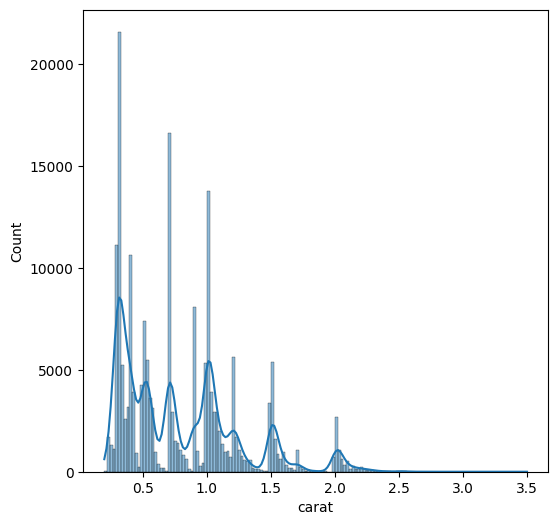

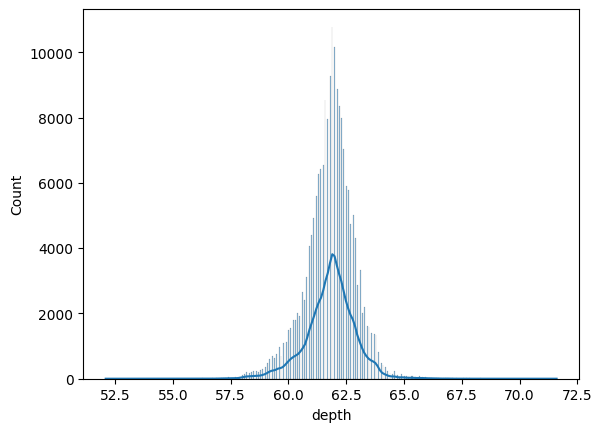

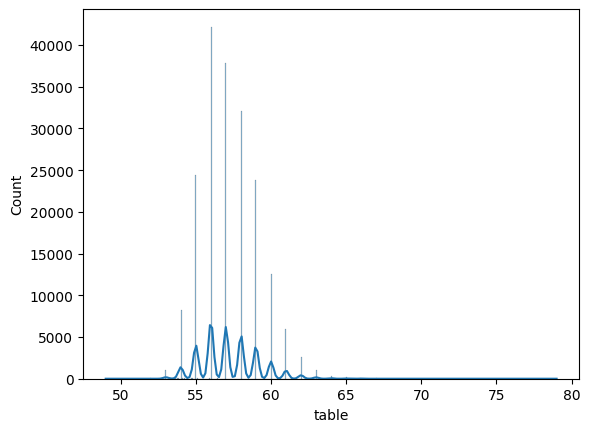

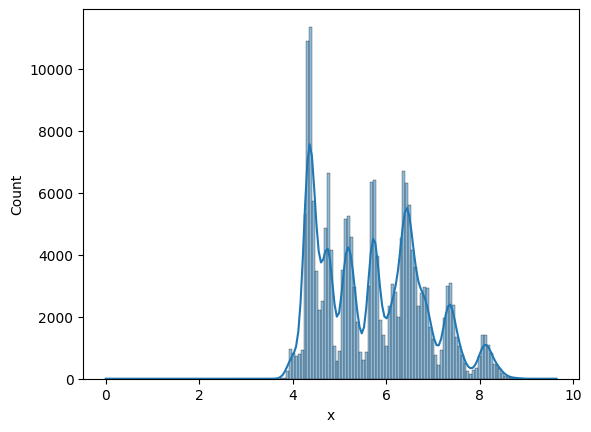

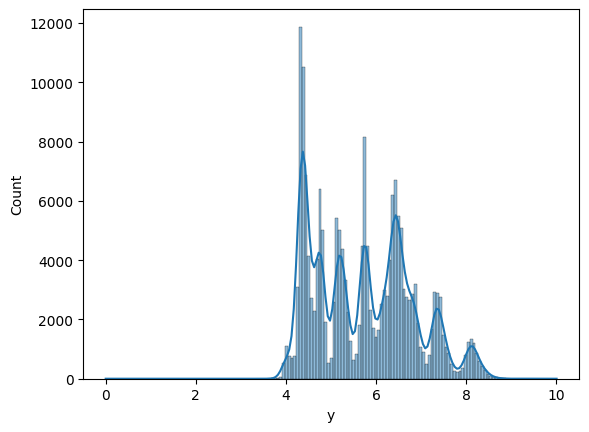

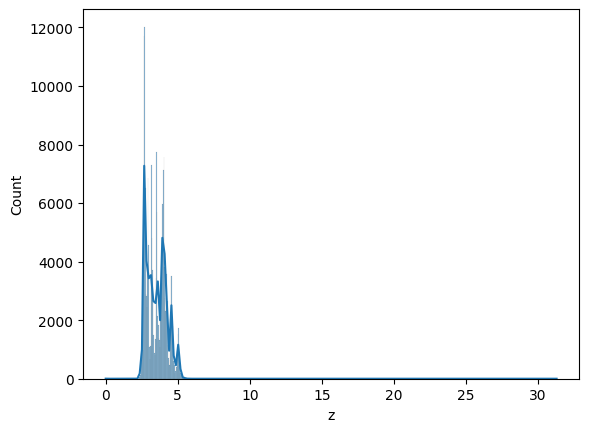

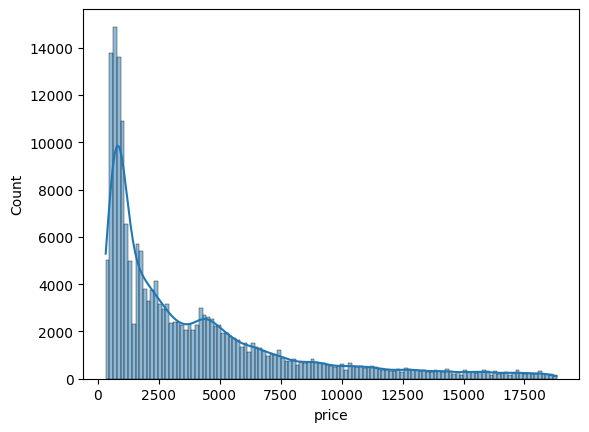

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

for col in ['carat','depth','table','x','y','z','price']:
    sns.histplot(data=data,x=col,kde=True)
    print('\n')
    plt.show()

In [12]:
sns.heatmap(data[['carat','depth','table','x','y','z','price']],annot=True)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001FFE8239580> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



: 

In [19]:
# ordinal encosding
cut_map={"fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map={"I1":1,"SI2":2 ,"SI1":3,"VS2":4 ,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
clor_map={"D":1,"E":2,"F":3,"G":4,"I":6,"J":7}

In [20]:
data['cut']=data['cut'].map(cut_map)
data['clarity']=data['clarity'].map(clarity_map)
data['color']=data['color'].map(clor_map)

In [21]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4.0,3.0,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3.0,7.0,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5.0,4.0,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5.0,4.0,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4.0,4.0,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5.0,1.0,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4.0,4.0,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3.0,3.0,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3.0,1.0,3,62.9,55.0,4.45,4.49,2.81,681
